# __Clustering Tweets by Hashtags__

## Data

In [1]:
import pandas as pd

In [2]:
tweets_df = pd.read_parquet('data/tweets/selected_tt_split.parquet')
tweets_df.shape

(1554613, 4)

In [3]:
tweets_df.head()

,author,user_description,tweet,hashtags
0,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]"
1,thivagando,🏳️‍🌈 O antropólogo que logo sou...\nPalavras-c...,Quase 400 mil mortos no Brasil por Covid-19 e ...,"[BolsonaroGenocida, ForaBolsonaro]"
2,AndreaPorto2021,,@jnascim @planalto Que horror esse @jairbolson...,"[ImpeachmentDeBolsonaroUrgente, CPIdaCovid]"
3,Sandroka131,“O Brasil que come não conhece o Brasil que te...,O PT está se reunindo com especialistas da saú...,"[CPIdaCovid, FINES]"
4,HSarapeck,"Rubro-negro, carioca, eleitor de Lula e do PT ...","Intervenção militar para abrir boates, shoppin...","[CPIdaCovid, ImpeachmentDeBolsonaroUrgente]"


In [4]:
def list_2_lower(l: list):
    return [s.lower() for s in l]

In [5]:
tweets_df['hashtags_lowercase'] = tweets_df['hashtags'].map(lambda x: list_2_lower(x))
tweets_df['hashtags_string'] = tweets_df['hashtags_lowercase'].map(lambda x: ' '.join(x))
tweets_df.head()

,author,user_description,tweet,hashtags,hashtags_lowercase,hashtags_string
0,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]","[cpidacovid, genocidadesgracado]",cpidacovid genocidadesgracado
1,thivagando,🏳️‍🌈 O antropólogo que logo sou...\nPalavras-c...,Quase 400 mil mortos no Brasil por Covid-19 e ...,"[BolsonaroGenocida, ForaBolsonaro]","[bolsonarogenocida, forabolsonaro]",bolsonarogenocida forabolsonaro
2,AndreaPorto2021,,@jnascim @planalto Que horror esse @jairbolson...,"[ImpeachmentDeBolsonaroUrgente, CPIdaCovid]","[impeachmentdebolsonarourgente, cpidacovid]",impeachmentdebolsonarourgente cpidacovid
3,Sandroka131,“O Brasil que come não conhece o Brasil que te...,O PT está se reunindo com especialistas da saú...,"[CPIdaCovid, FINES]","[cpidacovid, fines]",cpidacovid fines
4,HSarapeck,"Rubro-negro, carioca, eleitor de Lula e do PT ...","Intervenção militar para abrir boates, shoppin...","[CPIdaCovid, ImpeachmentDeBolsonaroUrgente]","[cpidacovid, impeachmentdebolsonarourgente]",cpidacovid impeachmentdebolsonarourgente


## Clustering: TF-IDF + KMeans

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
vec = TfidfVectorizer()
vec.fit(tweets_df['hashtags_string'])
features = vec.transform(tweets_df['hashtags_string'])
features.shape

(1554613, 60306)

In [8]:
sum_of_squared_distances = []
for k in range(2,11):
   print('Clustering K = ', k)
   km = KMeans(n_clusters=k)
   km.fit(features)
   sum_of_squared_distances.append(km.inertia_)

Clustering K =  2
Clustering K =  3
Clustering K =  4
Clustering K =  5
Clustering K =  6
Clustering K =  7
Clustering K =  8
Clustering K =  9
Clustering K =  10


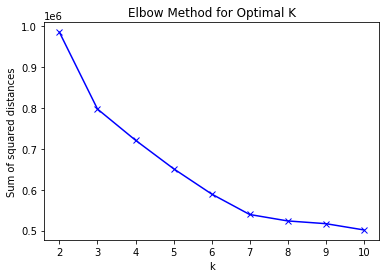

In [9]:
plt.plot(range(2,11), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [10]:
true_k = 3
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_

s_counts = pd.Series(labels).value_counts()
s_perc = pd.Series(labels).value_counts(normalize=True).values
for idx, val, perc in zip(s_counts.index, s_counts.values, s_perc):
    print(f'Cluster {idx}: {val} ({perc*100:.2f}%)')

Cluster 0: 845706 (54.40%)
Cluster 1: 427256 (27.48%)
Cluster 2: 281651 (18.12%)


In [11]:
result = pd.DataFrame({'user': tweets_df['author'], 'tweet': tweets_df['tweet'], 'hashtags':tweets_df['hashtags_lowercase'], 'hashtag_str': tweets_df['hashtags_string'],'cluster':labels})

In [12]:
result.query('cluster == 0').sample(20)

,user,tweet,hashtags,hashtag_str,cluster
1056867,GentileMoussa,"@MidiaNINJA ""Eu fico contente da vida em saber...","[24jforabolsonaro, 24jpovonasruas, forabolsonaro]",24jforabolsonaro 24jpovonasruas forabolsonaro,0
871173,horabrasilia,Luis Miranda procurou empresa para intermediar...,"[luismiranda, dominguetti, cpidacovid]",luismiranda dominguetti cpidacovid,0
859838,PlenoNews,Arthur Lira ironiza CPI da Covid: ‘Belíssimo t...,"[arthurlira, cpidacovid, plenonews]",arthurlira cpidacovid plenonews,0
30756,jaurojr,"Essa min. Teich tem uma amnésia séria, viu. Ou...","[cpidapandemia, cpidogenocidio]",cpidapandemia cpidogenocidio,0
534528,carlos_geovane,@MarcosRogerio - quem perde é o Brasil. \n- 48...,"[cpidacovid, jn]",cpidacovid jn,0
611062,AntonioCGRodri,E a tendência é que a imunização avance cada v...,[cpidocirco],cpidocirco,0
796328,RenatoPortLuppi,@10_5_6_5 Ele precisa ser convocado na CPI par...,"[renansabiadetudo, cpidocirco]",renansabiadetudo cpidocirco,0
1275385,BGiants1,"23:59 - ""eu defende intervenção militar""\n00:0...","[globonews, cpidacovid, forabolsonarogenocida,...",globonews cpidacovid forabolsonarogenocida for...,0
846638,SergioFDOlmos,@randolfeap Infelizmente um empresário sério e...,[cpidocirco],cpidocirco,0
128061,Helenova31,#RenanVagabundo vc é um despreparado. “Rezistr...,"[renanvagabundo, renanvagabundo]",renanvagabundo renanvagabundo,0


In [13]:
result.query('cluster == 1').sample(20)

,user,tweet,hashtags,hashtag_str,cluster
1149040,qqazinha,@EduGiraoOficial o senhor quer falar do sexo d...,[cpidacovid],cpidacovid,1
1351083,comunistaexaust,ALA FALOU SEM QUERER DO RICARDO AGORA VAI FICA...,[cpidacovid],cpidacovid,1
729624,mahabdalla,Base governista tumultando demais hj. MAS ELA ...,[cpidacovid],cpidacovid,1
837641,RonaldoCFuentes,@tesoureiros É difícil de engolir a tropa gove...,[cpidacovid],cpidacovid,1
47463,Gi12357958,@alessandromolon Essa crise recente com a Chin...,"[cpidacovid, cpidacovid]",cpidacovid cpidacovid,1
868046,UJSBRASIL,Lá vem Flávio Bolsonaro tirando a máscara! #CP...,[cpidacovid],cpidacovid,1
1109761,qqazinha,Sujinho esse senhor “Cascavel”\n\nAmanhã esper...,[cpidacovid],cpidacovid,1
925850,CaralhoRenato,“Ele ta aqui desde as 10 da manha”\n“Idai eu t...,[cpidacovid],cpidacovid,1
217357,lorenaoliveira,Pergunta do internauta 😂😂😂😂 #CPIdaCovid,[cpidacovid],cpidacovid,1
332044,putssgiu,EDUARDO GIRAO PARA DE SER BURRO PELO AMOR DE D...,[cpidacovid],cpidacovid,1


In [14]:
result.query('cluster == 2').sample(20)

,user,tweet,hashtags,hashtag_str,cluster
42311,BRABULLL,@rodrigobalakah1 @apolinarios @arthurcamargo @...,[forabolsonaro],forabolsonaro,2
1008415,ElaineSeeds,@jairbolsonaro Precisa voltar não ! #ForaBolso...,[forabolsonaro],forabolsonaro,2
1034310,DeboraFidanza,"""Para o mal triunfar, basta que os homens bons...",[forabolsonaro],forabolsonaro,2
1538298,carolinamacalos,Dias de atraso do pgto das bolsas do pibid. Ho...,[forabolsonaro],forabolsonaro,2
388811,willfernandesc,E é claro que só para constar e para me cancel...,[forabolsonaro],forabolsonaro,2
1541437,bbueno_tayna,@urrealyngg @NowUnitedMusic a Sabina curtiuuuu...,[forabolsonaro],forabolsonaro,2
669316,itsjaguarnow,quero esses artistas #ForaBolsonaro próximo a...,[forabolsonaro],forabolsonaro,2
473243,nelsonmaf,@blangeani Alimento para as milícias.\n\n#Fora...,[forabolsonaro],forabolsonaro,2
813023,robsonqsmsrs,@alessandromolon #ForaBolsonaro e vocês bolsom...,[forabolsonaro],forabolsonaro,2
1339241,Danielalopes152,"O presidente é o tópico marido agressor ,depoi...",[forabolsonaro],forabolsonaro,2


Cluster :  0


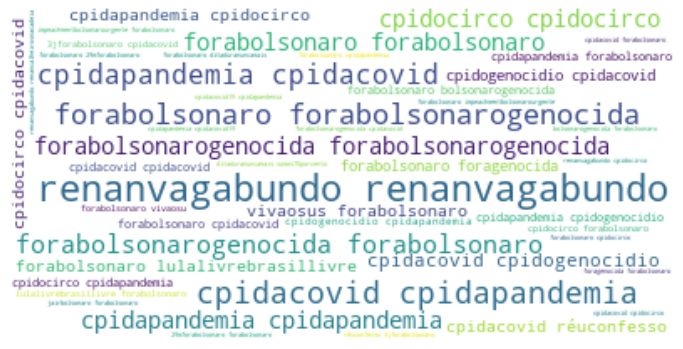

Cluster :  1


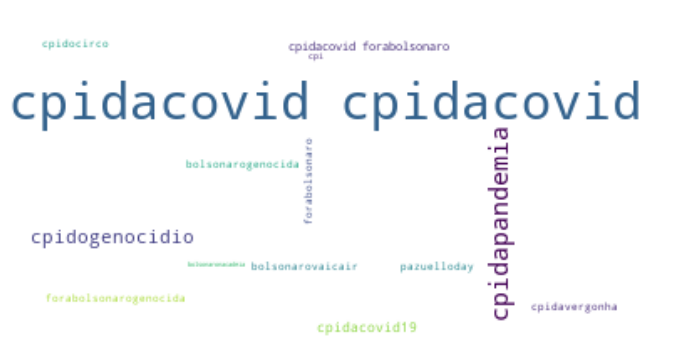

Cluster :  2


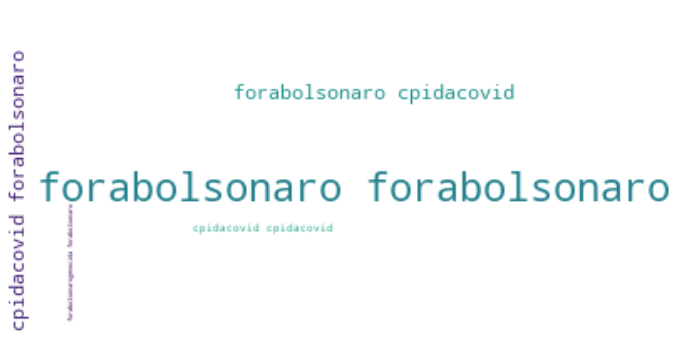

In [15]:
from wordcloud import WordCloud

for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['hashtag_str'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [17]:
for x in range(0, true_k):
    cluster_data = result[result['cluster']==x]
    hashtags_ = []
    for h_list in cluster_data['hashtags']:
        for ht in h_list:
            hashtags_.append(ht)
    s_counts_ = pd.Series(hashtags_).value_counts()[:20]
    s_perc_ = pd.Series(hashtags_).value_counts(normalize=True)[:20]
    print(f'\nCluster {x} top 20 hashtags:\n')
    for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
        print(f'#{idx}: {val} ({perc*100:.3f}%)')


Cluster 0 top 20 hashtags:

#forabolsonaro: 306388 (14.580%)
#cpidacovid: 173872 (8.274%)
#forabolsonarogenocida: 149991 (7.137%)
#cpidapandemia: 142445 (6.778%)
#renanvagabundo: 115318 (5.487%)
#cpidocirco: 111293 (5.296%)
#cpidogenocidio: 32790 (1.560%)
#bolsonarogenocida: 27744 (1.320%)
#vivaosus: 25881 (1.232%)
#impeachmentbolsonarourgente: 22229 (1.058%)
#29mforabolsonaro: 17812 (0.848%)
#foragenocida: 17714 (0.843%)
#cpidacovid19: 17379 (0.827%)
#3jforabolsonaro: 15007 (0.714%)
#lulalivrebrasillivre: 14293 (0.680%)
#réuconfesso: 12253 (0.583%)
#cpidavergonha: 12190 (0.580%)
#impeachmentbolsonaro: 11992 (0.571%)
#forabol卐onarogenocida: 11629 (0.553%)
#bolsonarovaicair: 11610 (0.552%)

Cluster 1 top 20 hashtags:

#cpidacovid: 428026 (99.955%)
#cpidapandemia: 72 (0.017%)
#cpidogenocidio: 35 (0.008%)
#forabolsonaro: 17 (0.004%)
#cpidacovid19: 15 (0.004%)
#cpidocirco: 7 (0.002%)
#cpidavergonha: 7 (0.002%)
#pazuelloday: 6 (0.001%)
#bolsonarogenocida: 6 (0.001%)
#forabolsonarogenocida: